<a href="https://colab.research.google.com/github/darsiltech/scoring-de-clientes/blob/main/scoring_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Scoring de Clientes

Basandome en un dataset real de un empresa financiera tomando el historico de 100 clientes activos hasta estos dias, busco crear una herramienta que me permita un mejor analisis comercial y de riesgo.

Los datos estan en un excel q esta subudo en dive:
https://docs.google.com/spreadsheets/d/11zQYsr3FVpSwXC5dZ-izM1UQqE5OtI6T/edit?usp=drive_link&ouid=115500018994462773408&rtpof=true&sd=true


Importacion de libreria y dataset

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/100 casos.xlsx")
df.shape

(674, 24)

Tipos de Datos

In [11]:
print('\nLostipos de datos son de tipo:\n',df.dtypes)


Lostipos de datos son de tipo:
 Cod Age                             int64
Agencia                            object
ID_CI                               int64
Solicitud                           int64
Aceptada                   datetime64[ns]
Producto                            int64
Nombre                             object
Tasa                              float64
Cap. solicitado                   float64
Cap. liquido                      float64
Cuotas                              int64
Mto Cuota                           int64
Familia                            object
Edad                                int64
Sexo                               object
Profesión                          object
Empresa                            object
Cant. Solic. Vigentes               int64
Cant. Solic. Canceladas             int64
Departamento                       object
Localidad                          object
Tipo de Venta                      object
Capital en mano                   float64
O

Primeras 5 filas

In [12]:
df.head(5)

,Cod Age,Agencia,ID_CI,Solicitud,Aceptada,Producto,Nombre,Tasa,Cap. solicitado,Cap. liquido,...,Sexo,Profesión,Empresa,Cant. Solic. Vigentes,Cant. Solic. Canceladas,Departamento,Localidad,Tipo de Venta,Capital en mano,Origen
0,9,Bella Unión,7386,8351,2004-08-26,76,PROM JULIO/04 $3000,70.00,3195.0,3000.0,...,MASCULINO,PUBLICO,"ADMINISTRACION NAL, DE CORREOS",1,16,ARTIGAS,BU,NaN,3000.00,NaN
1,9,Bella Unión,7386,13994,2005-03-21,52,"BUEN CLIENTE 13-18 COOP,",63.47,5575.0,5000.0,...,MASCULINO,PUBLICO,"ADMINISTRACION NAL, DE CORREOS",1,16,ARTIGAS,BU,NaN,4104.40,NaN
2,10,Paysandú,11854,15914,2005-05-10,49,"STANDAR 07-12 COOP,",75.80,4500.0,4000.0,...,MASCULINO,PRIVADO,SUCESORES DE PEDRO WYAUX LARDO,0,9,PAYSANDU,PU,NaN,4000.00,NaN
3,9,Bella Unión,7386,25442,2005-11-17,127,PROMO 5000 SET 05,55.00,5225.0,5000.0,...,MASCULINO,PUBLICO,"ADMINISTRACION NAL, DE CORREOS",1,16,ARTIGAS,BU,NaN,2653.43,NaN
4,8,Colonia,10116,26530,2005-12-06,134,PROMO NOV 05 6000,52.20,6270.0,6000.0,...,FEMENINO,PUBLICO,EDUCACION PRIMARIA,0,8,COLONIA,CO,NaN,6000.00,NaN


#El archivo contiene las siguientes hojas:

Datallo solamentes las tres hojas que pretendo usar para el analisis

**PS – Información sobre productos y solicitudes.**

Cod Age,Codigo Agencia

Agencia,Nombre agencia

ID_CI,Identificacion

Solicitud,numero de solicitud

Aceptada,Fecha de aceptada

Producto,Numero de producto

Nombre,Nombre de producto

Tasa,Tasa

Cap. solicitado,Capital Solicitado

Cap. liquido,Capital Liquido

Cuotas,Cantidad de cuotas

Mto Cuota,Monto de cuota

Familia,Familia de Productos

Edad,Edad

Sexo,Sexo

Profesión,Profesión

Empresa,Empresa

Cant. Solic. Vigentes,Cant. Solic. Vigentes

Cant. Solic. Canceladas,Cant. Solic. Canceladas

Departamento,Departamento

Localidad,Localidad

Tipo de Venta,Tipo de Venta

Capital en mano, Capital en mano

Origen,Origen

**SOLICITU – Detalles de solicitudes de crédito.**

EmpCod,Codigo Agencia

SolNro,numero de solicitud

ID_CI,Identificacion

SolFecha,Fecha de solicitud

SolCuotas,Cantidad de cuotas

SolStatus,estatu

SolFecAcep,Fecha de aceptada

SolCapital,Capital Liquido

SolPrdCod,Numero de producto

SolMtoValC,Monto de cuota

SolIvaTasa,iva

SolTasInt,tas interes

SolPriVenc,primer vencimiento

SolFecCanc,fecha de cancelacion

SolTotCanc,total de cancelacion

SolNroCanc,numero de cancelacion

SolTpEmi,Tipo de emision

SolTpCan,tipo de cancelacion

SolConPad,PAD

SolFecClea,Fecha del clearing

SolEnJur,En juridica

SolUltVen,Ultimo vencimiento

**CLIENTE – Información personal y financiera de los clientes.**

ID_CI,Identificacion

CliIngNom,Ingreso nominal

CliIngLiq,ingreso liquido

CliIngLega,ingreso legal

CliLaboral,

LocCod,localidad

CliNacio,fecha nacimiento

CliSexo,sexo

CliNacion,nacionalidad

CliEstCiv,estado civil

ClideCrd,

ClideEnd,

CliHijos,cantidad hijos

CliAcargo,cantidad hijos a cargo

CliProf,profesion

CliEmpNom,empresa

CliMtoCuo,monto cuota

CliMtoAlq,monto alquiler

CliCrdFall,

CliCrdFeFa,

CliUltAct,

**CLEARING – Datos de historial crediticio.**

**MOVIM – Movimientos financieros de los clientes.**

**BCU – Información de calificación crediticia.**

**PGOCUO – Detalles de pagos de cuotas.**


En el entendido que no voy a llegar a un Scoring y mas bien va a ser un analisis de los datos dado q de momento no estoy preparado con lo dado en el curso hasta el momento.


Publico objetivo para este analisis seria Gerente Comercial y Gerente de Riesgos.

**Me planteo tres interroganes posibles para analizar:**

1. ¿Cuál es la distribución de edad de los clientes por género?

Esta pregunta nos ayuda a entender cómo se distribuyen las edades entre hombres y mujeres. Podría ser útil para segmentar clientes según género y rango etario.

2. ¿Cuáles son los departamentos con más solicitudes de crédito?

Esta pregunta permite identificar las regiones con mayor actividad crediticia.

3. ¿Qué relación existe entre el monto del crédito solicitado y la cantidad de cuotas?

Esto ayuda a entender si las personas que solicitan montos más altos tienden a financiar a mayor plazo.

Hojas disponibles en el Excel: dict_keys(['PS', 'SOLICITU', 'CLIENTE', 'CLEARING', 'MOVIM', 'BCU', 'PGOCUO', 'DETALLES'])


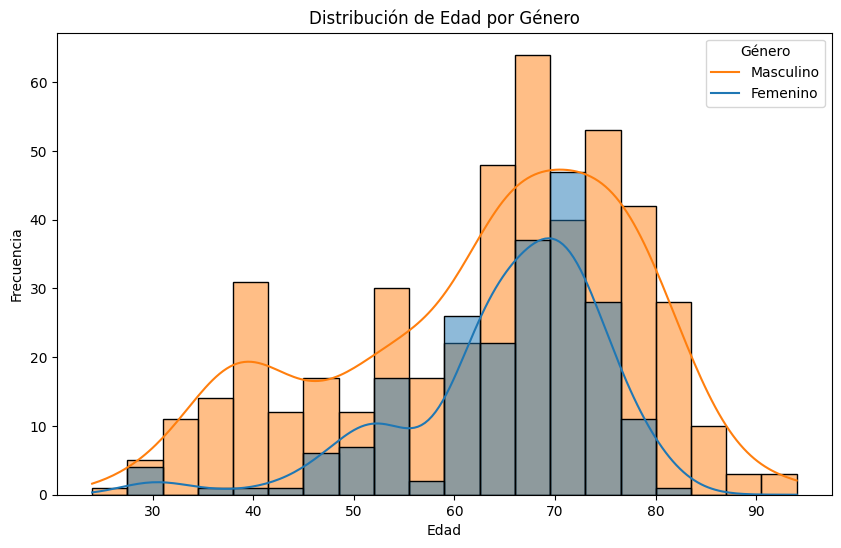

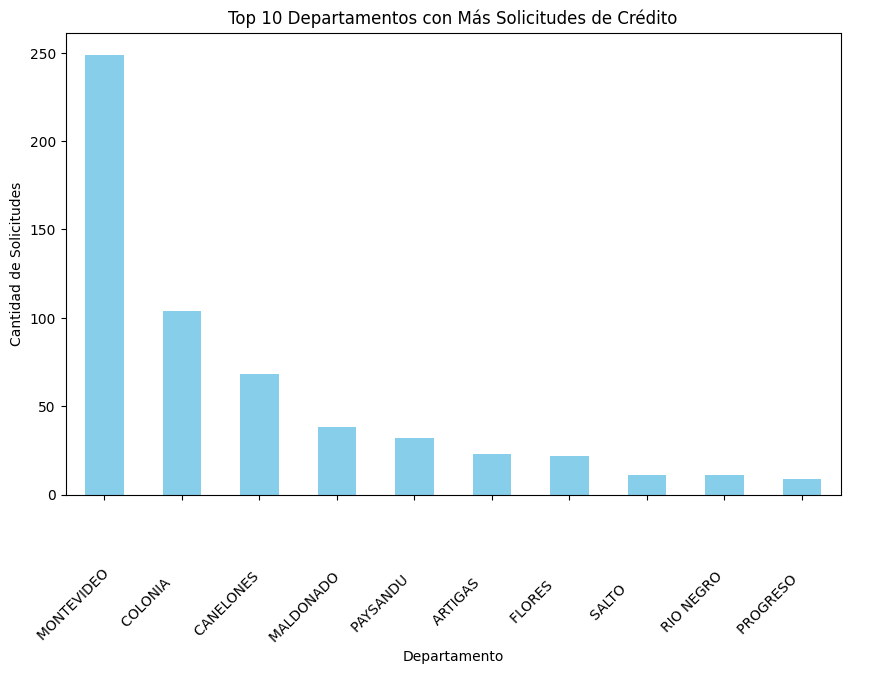

In [29]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo Excel
ruta_excel = "/content/drive/MyDrive/Colab Notebooks/100 casos.xlsx"  # Cambia esto por la ruta de tu archivo
df_dict = pd.read_excel(ruta_excel, sheet_name=None)

# Verificar qué hojas tiene el archivo Excel
print("Hojas disponibles en el Excel:", df_dict.keys())

# Ahora respondemos las preguntas:

# **1. Distribución de edad de los clientes por género**
clientes = df_dict["PS"]  # Asegúrate de que la hoja se llama "PS"

# Graficar la distribución de edad por género
plt.figure(figsize=(10, 6))
sns.histplot(data=clientes, x="Edad", hue="Sexo", kde=True, bins=20)
plt.title("Distribución de Edad por Género")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend(title="Género", labels=["Masculino", "Femenino"])
plt.show()

# **2. Departamentos con más solicitudes de crédito**
solicitudes = df_dict["PS"]  # Asegúrate de que la hoja se llama "PS"

# Contar solicitudes por departamento
departamentos_top = solicitudes["Departamento"].value_counts().head(10)

# Graficar los departamentos con más solicitudes
plt.figure(figsize=(10, 6))
departamentos_top.plot(kind="bar", color="skyblue")
plt.title("Top 10 Departamentos con Más Solicitudes de Crédito")
plt.xlabel("Departamento")
plt.ylabel("Cantidad de Solicitudes")
plt.xticks(rotation=45)
plt.show()



dict_keys(['PS', 'SOLICITU', 'CLIENTE', 'CLEARING', 'MOVIM', 'BCU', 'PGOCUO', 'DETALLES'])
Index(['EmpCod', 'SolNro', 'ID_CI', 'SolFecha', 'SolCuotas', 'SolStatus',
       'SolFecAcep', 'SolCapital', 'SolPrdCod', 'SolMtoValC', 'SolIvaTasa',
       'SolTasInt', 'SolPriVenc', 'SolFecCanc', 'SolTotCanc', 'SolNroCanc',
       'SolTpEmi', 'SolTpCan', 'SolConPad', 'SolFecClea', 'SolEnJur',
       'SolUltVen'],
      dtype='object')
Index(['EmpCod', 'SolNro', 'ID_CI', 'SolFecha', 'SolCuotas', 'SolStatus',
       'SolFecAcep', 'SolCapital', 'SolPrdCod', 'SolMtoValC', 'SolIvaTasa',
       'SolTasInt', 'SolPriVenc', 'SolFecCanc', 'SolTotCanc', 'SolNroCanc',
       'SolTpEmi', 'SolTpCan', 'SolConPad', 'SolFecClea', 'SolEnJur',
       'SolUltVen'],
      dtype='object')


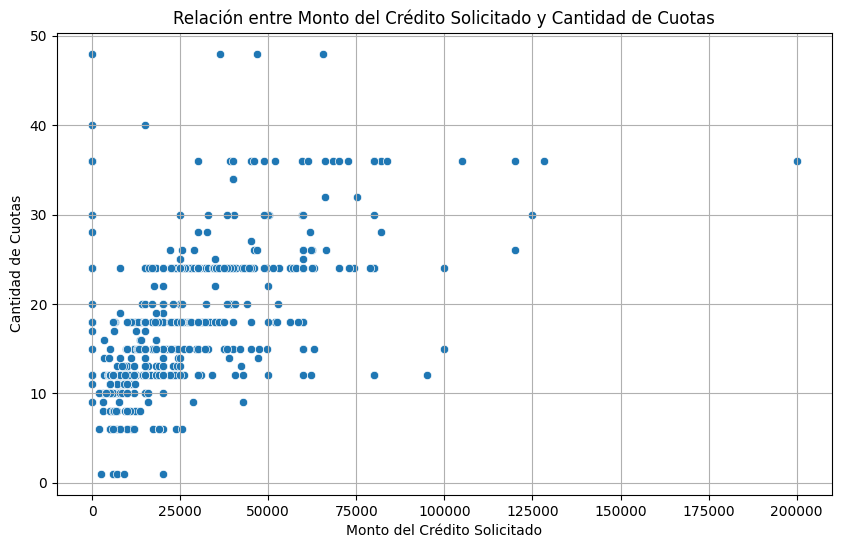

In [30]:
# Verificar las hojas cargadas en el diccionario
print(df_dict.keys())

# Verificar las columnas disponibles en la hoja 'SOLICITU'
print(df_dict["SOLICITU"].columns)

# Asignar la hoja 'SOLICITU' a una variable
solicitu = df_dict["SOLICITU"]

# Verificar las columnas disponibles en el DataFrame
print(solicitu.columns)

# Crear un gráfico de dispersión entre monto del crédito solicitado y cantidad de cuotas
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=solicitu, x="SolCapital", y="SolCuotas")
plt.title("Relación entre Monto del Crédito Solicitado y Cantidad de Cuotas")
plt.xlabel("Monto del Crédito Solicitado")
plt.ylabel("Cantidad de Cuotas")
plt.grid(True)
plt.show()

